In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.cms.style.ROOT)
plt.rcParams['axes.axisbelow'] = True

In [2]:
def softmax(array):
    N = len(array[:,0])
    d = len(array[0,:])
    softmax_output = np.zeros((N,d))
    for i in range(N):
        for j in range(d):
            softmax_output[i,j] = np.exp(array[i,j])/np.sum(np.exp(array[i,:]))
    return softmax_output

<ipython-input-2-5a0e93083ab4>:7: RuntimeWarning: overflow encountered in exp
  softmax_output[i,j] = np.exp(array[i,j])/np.sum(np.exp(array[i,:]))
<ipython-input-2-5a0e93083ab4>:7: RuntimeWarning: invalid value encountered in float_scalars
  softmax_output[i,j] = np.exp(array[i,j])/np.sum(np.exp(array[i,:]))
<ipython-input-3-30566f98789f>:12: RuntimeWarning: divide by zero encountered in log
  loss = -np.log(softmax(output)[:,0])


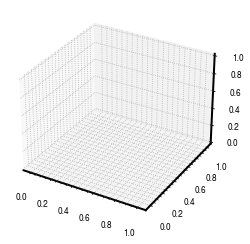

In [3]:
model_names = ['nominal']#]#,,],'fgsm'
jet_names = ['zerogradjet']#,'bjet']
mode = 'loss'#'prob_isG'

for model_name in model_names:
    for jet_name in jet_names:
        output = np.load('/eos/user/h/heschone/DeepJet/Train_DF_Run2/{}/variables/{}_grid_loss.npy'.format(model_name,jet_name),allow_pickle=True)
        pt = np.load('/eos/user/h/heschone/DeepJet/Train_DF_Run2/{}/variables/{}_grid_pt.npy'.format(model_name,jet_name),allow_pickle=True)
        eta = np.load('/eos/user/h/heschone/DeepJet/Train_DF_Run2/{}/variables/{}_grid_eta.npy'.format(model_name,jet_name),allow_pickle=True)
        ax = plt.axes(projection ='3d')
        if mode=='loss':
            loss = -np.log(softmax(output)[:,0])
            ax.scatter(pt, eta, loss, c=loss, alpha=.4)
        else:
            ax.scatter(pt, eta, output[:,5], c=output[:,5], alpha=.4)
        plt.savefig('variable_plots/{}_{}.pdf'.format(model_name, jet_name))

In [4]:
output[:,5]

array([376.04187, 376.0419 , 376.0418 , ..., 376.0482 , 376.04828,
       376.04828], dtype=float32)

In [7]:
print(np.max(output[:,0]))
print(np.mean(output[:,0]))

192.14528
192.1452


In [8]:
print(np.max(output[:,5]))
print(np.mean(output[:,5]))

-270.6749
-270.67523
